# Autism Sprectrum Disorder

## Data

ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient

relation - Relation of patient who completed the test

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
train=pd.read_csv(r"train.csv")
test=pd.read_csv(r"test.csv")

In [3]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [4]:
train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


In [5]:
train.isna().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

# visualization

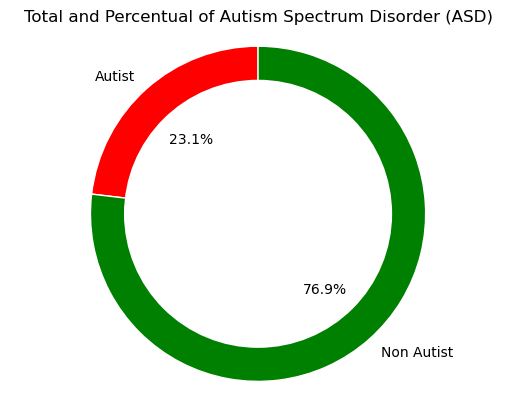

In [6]:

autism_map = {1: 'Autist', 0: 'Non Autist'}
autism_colors = ['red', 'green']

total_count = len(train)
autist_count = train['Class/ASD'].sum()
non_autist_count = total_count - autist_count

autist_percent = autist_count / total_count * 100
non_autist_percent = non_autist_count / total_count * 100

fig, ax = plt.subplots()

ax.pie([autist_percent, non_autist_percent], labels=[f'Autist', f'Non Autist'],
       autopct='%1.1f%%', startangle=90, colors=autism_colors, wedgeprops=dict(width=.4, edgecolor='w'))

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()


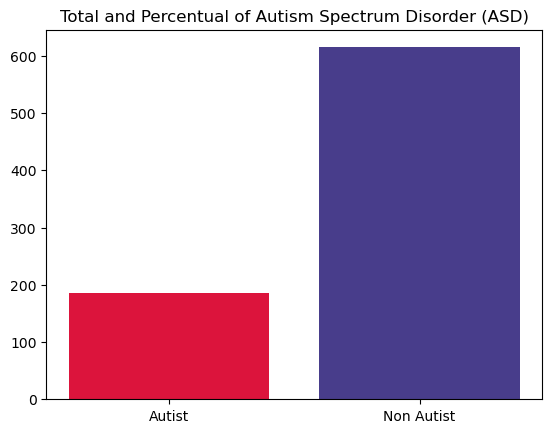

In [7]:
autist_count = train['Class/ASD'].sum()
non_autist_count = len(train) - autist_count

fig, ax = plt.subplots()

ax.bar(['Autist', 'Non Autist'], [autist_count, non_autist_count], color=['crimson', 'darkslateblue'])

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()


In [8]:
train["ethnicity"].value_counts()

White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: ethnicity, dtype: int64

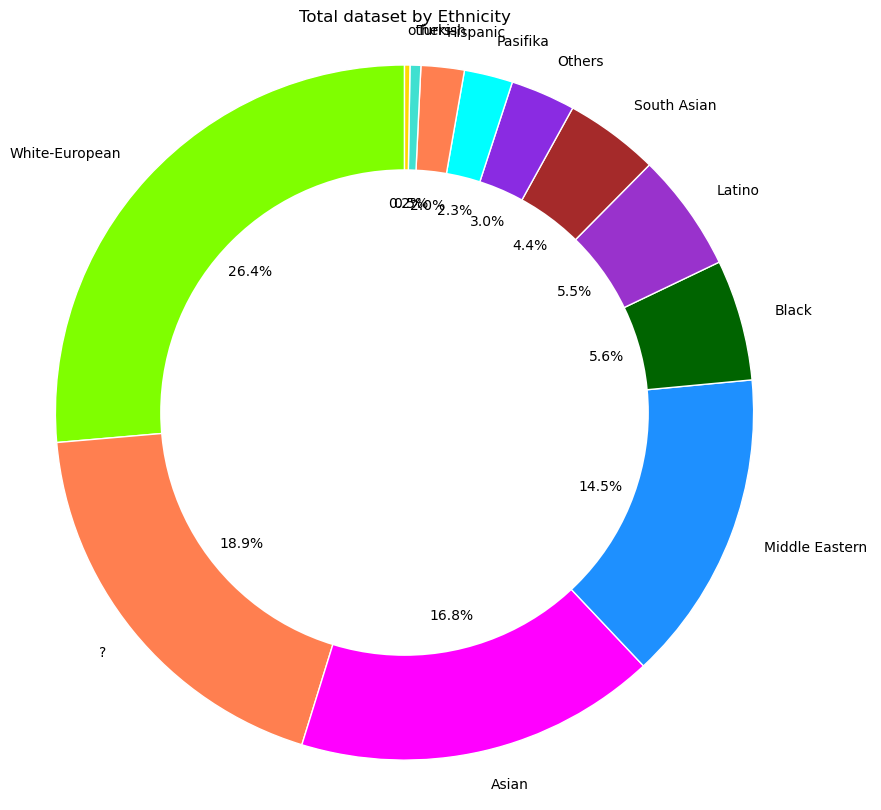

In [9]:
# Define colors for each ethnicity
ethnicity_colors = ['chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 'darkorchid', 'brown', 'BlueViolet', 'cyan', 'coral', 'Turquoise', 'Gold']

# Plotting the donut chart for ethnicity
fig, ax = plt.subplots(figsize=(10, 10))

# Extract ethnicity counts from the DataFrame
ethnicity_counts = train['ethnicity'].value_counts()

# Draw the donut chart
ax.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=90,
       colors=ethnicity_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.title('Total dataset by Ethnicity')
plt.show()


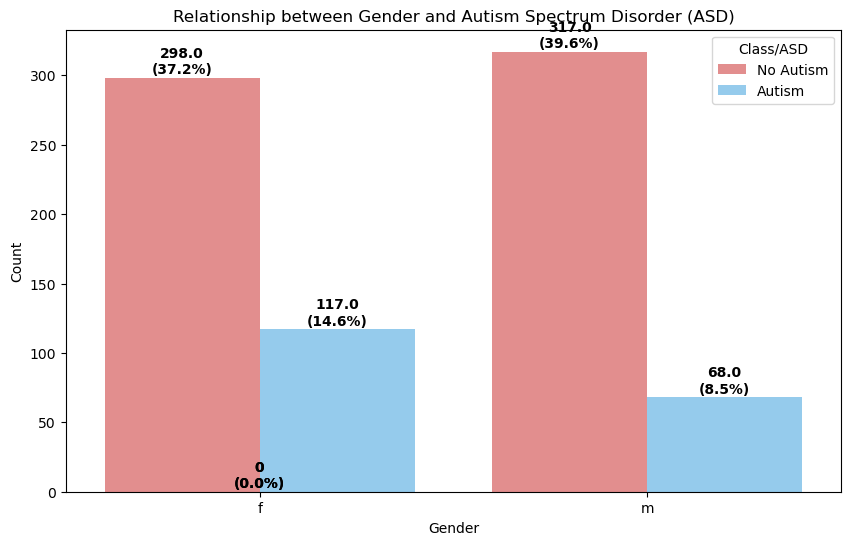

In [10]:
# Define colors for each class
class_colors = {0: 'lightskyblue', 1: 'lightcoral'}


# Plotting the relationship between Gender and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue="Class/ASD", data=train, palette=set(class_colors.values()))

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Autism Spectrum Disorder (ASD)')


# Display the plot
plt.show()


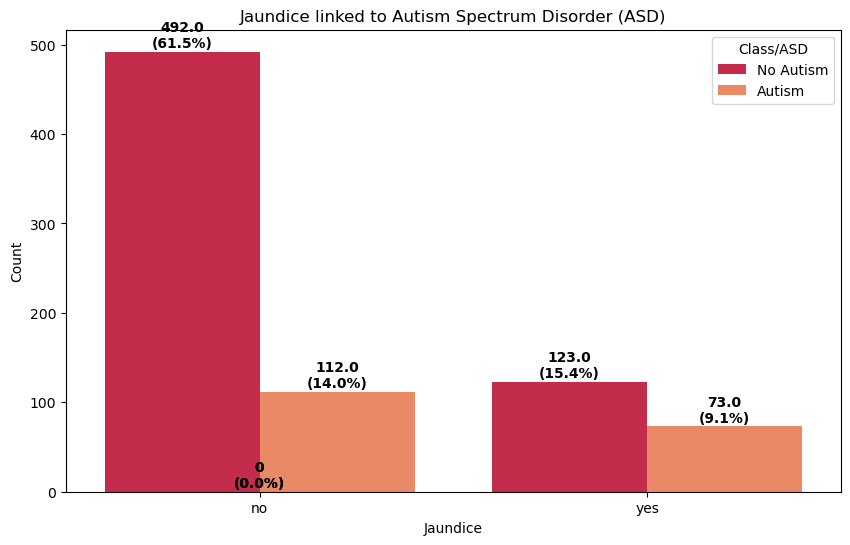

In [11]:
# Define colors for each class
jaundice_colors = ['crimson', 'coral']
jaundice_map = {'yes': 'Jaundice', 'no': 'No Jaundice'}

# Plotting the relationship between Jaundice and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='jaundice', hue='Class/ASD', data=train, palette=jaundice_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.title('Jaundice linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


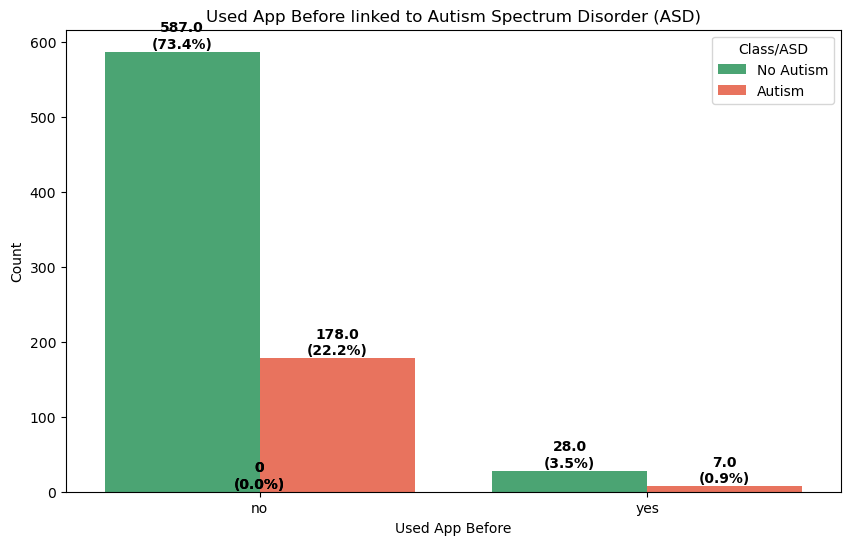

In [12]:
# Define colors for each class
used_app_colors = ['mediumseagreen', 'tomato']
used_app_map = {'yes': 'Used App Before', 'no': 'No App Usage'}

# Plotting the relationship between Used App Before and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='used_app_before', hue='Class/ASD', data=train, palette=used_app_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Used App Before')
plt.ylabel('Count')
plt.title('Used App Before linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


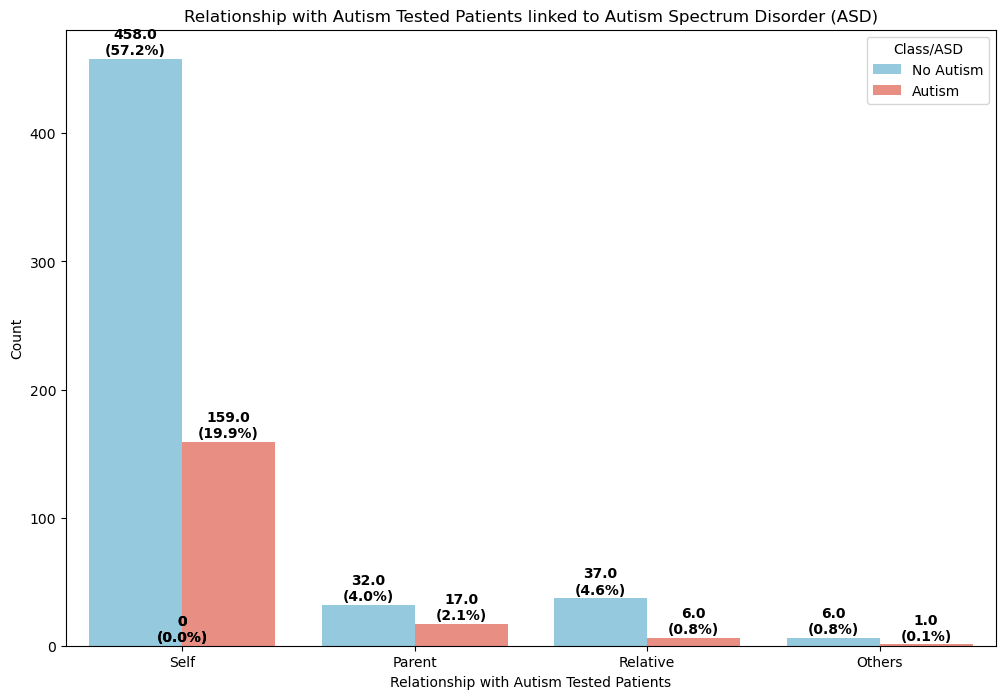

In [13]:
# Define colors for each class
relation_colors = ['skyblue', 'salmon']
relation_map = {'Self': 'Self', 'Parent': 'Parent', 'Relative': 'Relative', 'Others': 'Others'}

# Plotting the relationship with Autism Tested Patients and Class/ASD
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='relation', hue='Class/ASD', data=train, palette=relation_colors, order=['Self', 'Parent', 'Relative', 'Others'])

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Relationship with Autism Tested Patients')
plt.ylabel('Count')
plt.title('Relationship with Autism Tested Patients linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

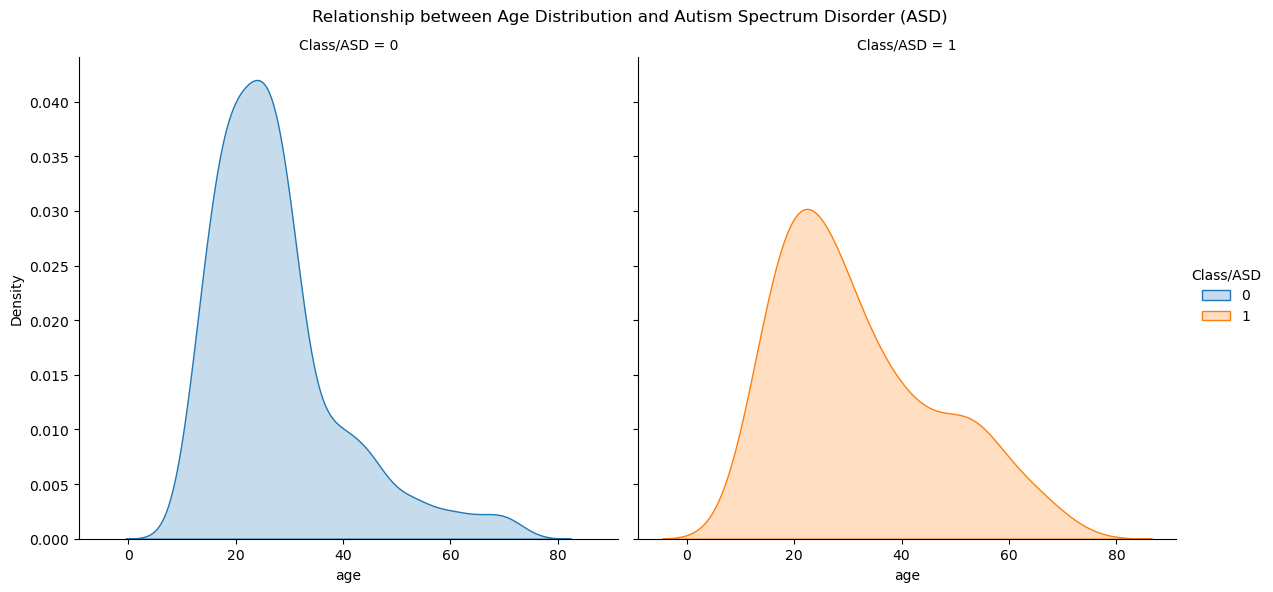

In [14]:
# Plotting the relationship between age distribution and Class/ASD
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(train, col='Class/ASD', hue='Class/ASD', height=6)
g.map(sns.kdeplot, 'age', fill=True)
g.add_legend()

# Setting labels and title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Age Distribution and Autism Spectrum Disorder (ASD)')

# Display the plot
plt.show()


# Preprocessing

### 1.Data dosen't have a null value

### 2.Data Encoding

In [15]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [16]:
cat = {'ethnicity':'category',
       'gender':'category', 
       'jaundice':'category',
       'austim':'category',
       'contry_of_res':'category', 
       'used_app_before':'category',
        'age_desc':'category',
        'relation':'category'}
test = test.astype(cat)
train = train.astype(cat)

In [17]:
cat_columns = ['ethnicity', 'gender', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for col in cat_columns:
    train[col] = train[col].cat.codes
    test[col] = test[col].cat.codes


In [18]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,0,10,0,0,58,0,7.819715,0,5,0
1,2,0,0,0,0,0,0,0,0,0,...,0,8,0,0,6,0,10.544296,0,0,0
2,3,1,1,1,1,1,1,0,0,1,...,0,10,0,0,57,0,13.167506,0,5,1
3,4,0,0,0,1,0,0,0,0,0,...,0,8,0,0,39,0,1.530098,0,0,0
4,5,0,0,0,0,1,0,0,0,1,...,1,2,0,1,32,0,7.949723,0,5,0


In [19]:
print(train.dtypes)

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender                int8
ethnicity             int8
jaundice              int8
austim                int8
contry_of_res         int8
used_app_before       int8
result             float64
age_desc              int8
relation              int8
Class/ASD            int64
dtype: object


### 3.Drop unuseful data

In [20]:
train=train.drop('ID', axis=1)
train=train.drop('relation', axis=1)

In [21]:
test=test.drop('ID', axis=1)
test=test.drop('relation', axis=1)

### 4.Split Data

In [22]:
X = train.drop('Class/ASD', axis=1)
y = train['Class/ASD']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.Standard Scaler


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.fit_transform(test)

# Classification

## 1.Random Forest

In [24]:
classifier = RandomForestClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = classifier.predict(X_test)

In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_rf = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_rf)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[107  14]
 [ 11  28]]
Accuracy: 0.84375
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       121
           1       0.67      0.72      0.69        39

    accuracy                           0.84       160
   macro avg       0.79      0.80      0.79       160
weighted avg       0.85      0.84      0.85       160



In [26]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_rf,recall_rf,fscore_rf,support_rf=score(y_val, y_pred)
print(precision_rf)

[0.90677966 0.66666667]


ROC-AUC Score: 0.8011231193049375


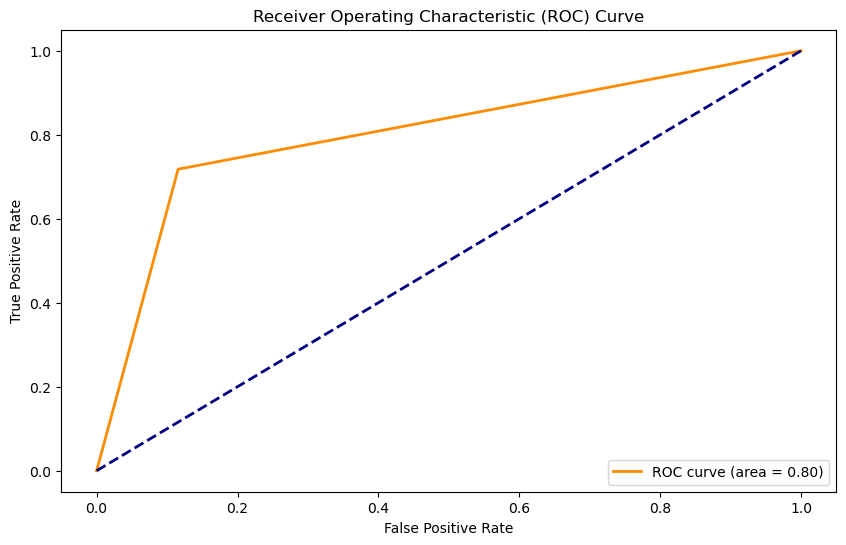

In [27]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 2. Decision Tree

In [28]:
dtree = DecisionTreeClassifier(criterion="gini")

# Train the classifier on the training data
dtree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = dtree.predict(X_test)

In [29]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_dt = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_dt)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[103  18]
 [ 14  25]]
Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       121
           1       0.58      0.64      0.61        39

    accuracy                           0.80       160
   macro avg       0.73      0.75      0.74       160
weighted avg       0.81      0.80      0.80       160



In [30]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_dt,recall_dt,fscore_dt,support_dt=score(y_val, y_pred)
print(precision_dt)

[0.88034188 0.58139535]


ROC-AUC Score: 0.7461326552235643


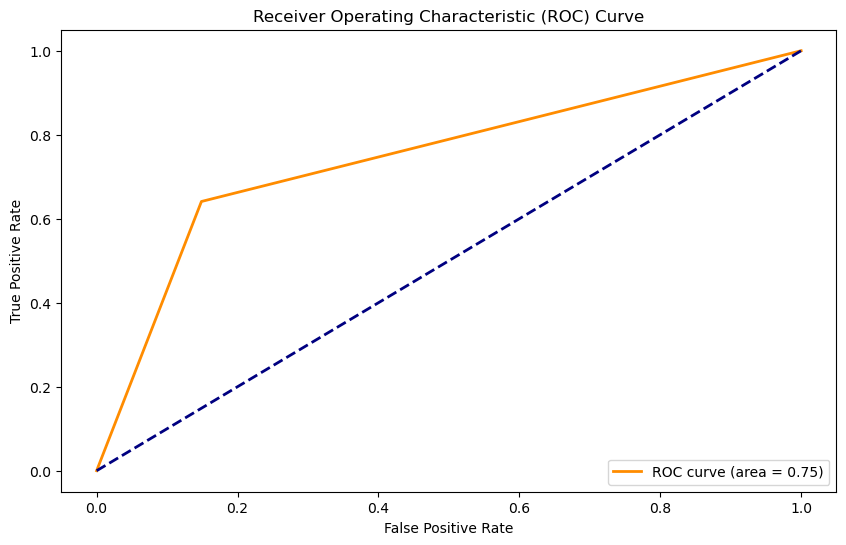

In [31]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 3. ANN model

In [32]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=20, activation='relu', input_dim=X_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units=15, activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN on the training data
classifier.fit(X_train, y_train, batch_size=32, epochs=50)

# Make predictions on the validation data
y_predict = classifier.predict(X_val)
y_predict = (y_predict > 0.5)

# We can predict for the test dataset given using below code
# y_predict = classifier.predict(X_test)

Epoch 1/50
20/20 [==============================] - 1s 2ms/step - loss: 0.7026 - accuracy: 0.5406
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7812
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.8453
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8656
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.8734
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8750
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8766
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8813
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.8859
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8844
Epoch 11/50
20/20 [

In [33]:
# Evaluate the model
conf_matrix = confusion_matrix(y_val, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

accuracy_ANN = accuracy_score(y_val, y_predict)
print("Accuracy:", accuracy_ANN)

class_report = classification_report(y_val, y_predict)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[106  15]
 [ 14  25]]
Accuracy: 0.81875
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       121
           1       0.62      0.64      0.63        39

    accuracy                           0.82       160
   macro avg       0.75      0.76      0.76       160
weighted avg       0.82      0.82      0.82       160



In [34]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_ANN,recall_ANN,fscore_ANN,support_ANN=score(y_val, y_predict)
print(precision_ANN)

[0.88333333 0.625     ]


ROC-AUC Score: 0.7585293494384403


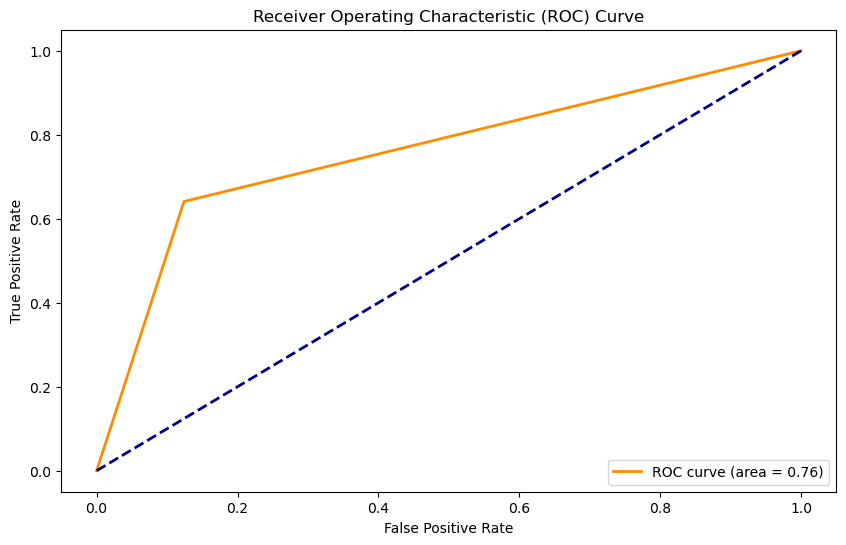

In [35]:
roc_auc = roc_auc_score(y_val, y_predict)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_predict)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 4. SVM model

In [36]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = clf.predict(X_test)

In [37]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_svm = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_svm)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[104  17]
 [ 11  28]]
Accuracy: 0.825
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       121
           1       0.62      0.72      0.67        39

    accuracy                           0.82       160
   macro avg       0.76      0.79      0.77       160
weighted avg       0.84      0.82      0.83       160



In [38]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_svm,recall_svm,fscore_svm,support_svm=score(y_val, y_pred)
print(precision_svm)

[0.90434783 0.62222222]


ROC-AUC Score: 0.7887264250900615


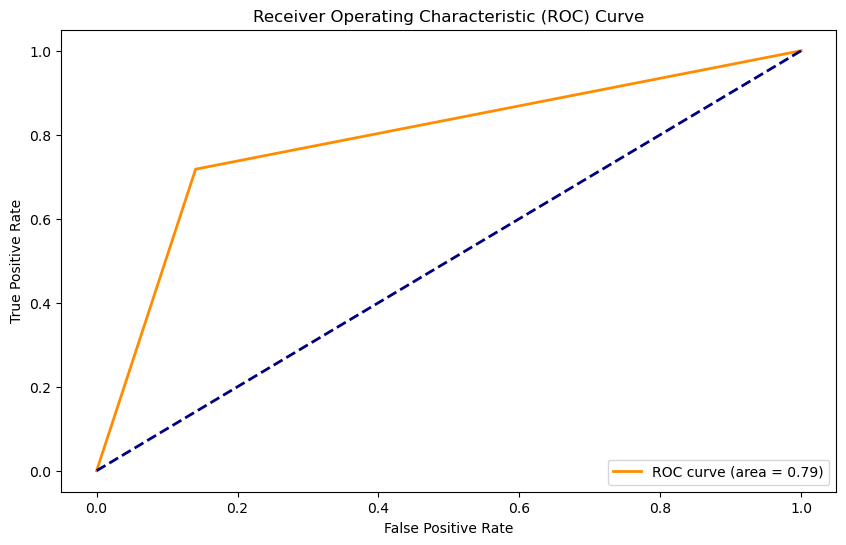

In [39]:
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 5. Logistic Regression model

In [40]:
#Import Linear model
from sklearn import linear_model

#Create a Logistic Regression Classifier
logr = linear_model.LogisticRegression()

#Fitting the Multiple Logistic Regression model
logr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logr.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = logr.predict(X_test)

In [41]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_logr = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_logr)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[104  17]
 [ 13  26]]
Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       121
           1       0.60      0.67      0.63        39

    accuracy                           0.81       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.82      0.81      0.82       160



In [42]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_logr,recall_logr,fscore_logr,support_logr=score(y_val, y_pred)
print(precision_logr)

[0.88888889 0.60465116]


ROC-AUC Score: 0.7630853994490358


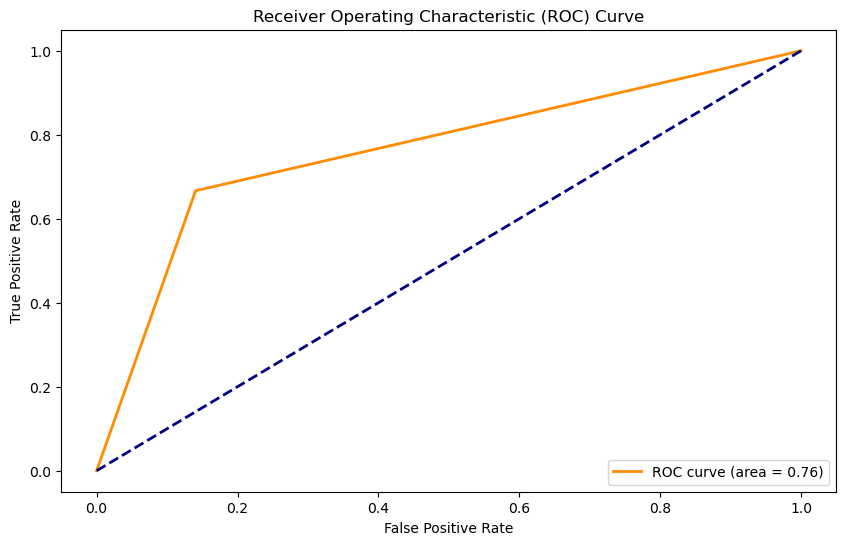

In [43]:
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 6. Naive Bayes

In [44]:
#Import GaussianNB model
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
gnb = GaussianNB()

# Model training
gnb.fit(X_train, y_train)

# Predict Output
y_pred = gnb.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = gnb.predict(X_test)

In [45]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_gnb = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_gnb)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[101  20]
 [  6  33]]
Accuracy: 0.8375
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.89       121
           1       0.62      0.85      0.72        39

    accuracy                           0.84       160
   macro avg       0.78      0.84      0.80       160
weighted avg       0.87      0.84      0.84       160



In [46]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_gnb,recall_gnb,fscore_gnb,support_gnb=score(y_val, y_pred)
print(precision_gnb)

[0.94392523 0.62264151]


ROC-AUC Score: 0.8404322949777495


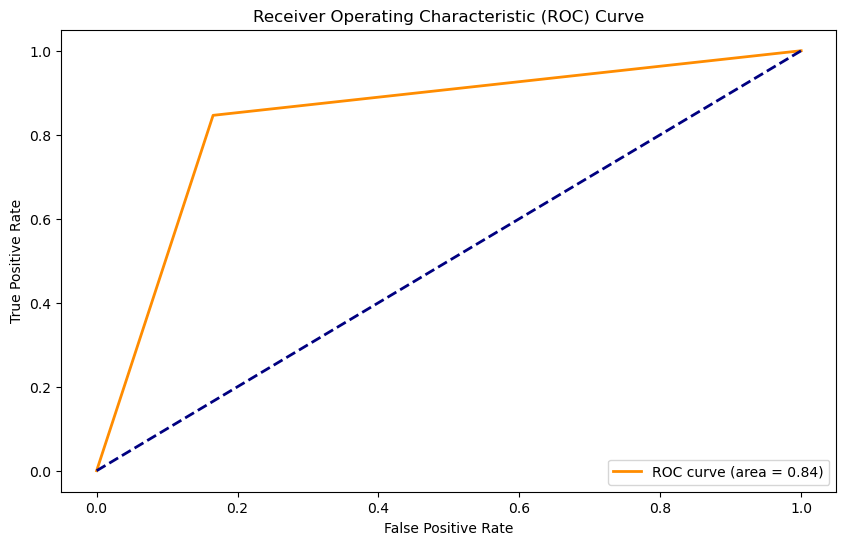

In [47]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 7. KNN

In [48]:
#Import KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

# Model training
knn.fit(X_train, y_train)

# Predict Output
y_pred = knn.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = knn.predict(X_test)

In [49]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_knn = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_knn)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[103  18]
 [  9  30]]
Accuracy: 0.83125
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       121
           1       0.62      0.77      0.69        39

    accuracy                           0.83       160
   macro avg       0.77      0.81      0.79       160
weighted avg       0.85      0.83      0.84       160



In [50]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_knn,recall_knn,fscore_knn,support_knn=score(y_val, y_pred)
print(precision_knn)

[0.91964286 0.625     ]


ROC-AUC Score: 0.8102352193261284


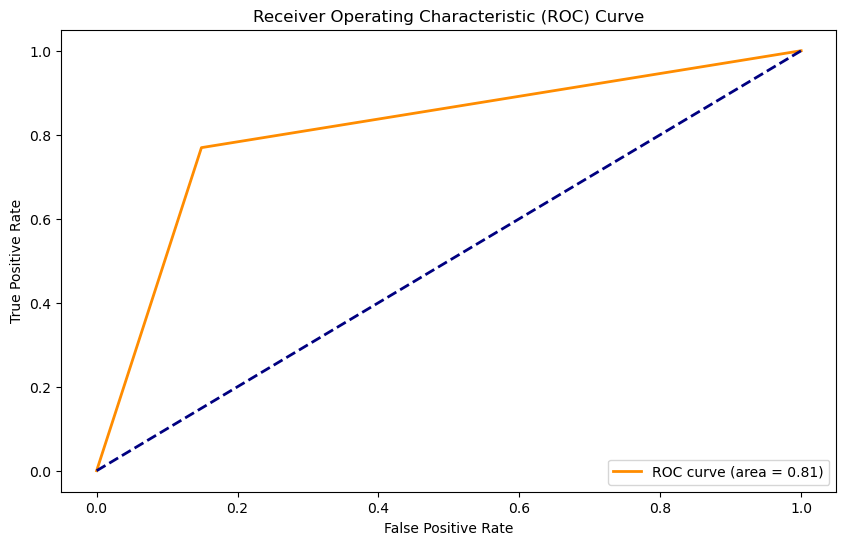

In [51]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## LSTM

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np

# Debugging step: print the shape of X_train before reshaping
print("Original shape of X_train:", X_train.shape)
print("Original shape of X_val:", X_val.shape)

# Check if X_train has the expected shape (samples, features)
if X_train.shape[0] * X_train.shape[1] == 12160:
    # Reshape X_train to (samples, timesteps, features) for LSTM
    X_train_LSTM = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))  # (samples, timesteps, features)
    X_val_LSTM = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))  # (samples, timesteps, features)
else:
    print("Shape mismatch: Unable to reshape X_train to the expected shape for LSTM input.")

# Debugging step: print the shape after reshaping to confirm
print("Shape of X_train after reshaping:", X_train_LSTM.shape)
print("Shape of X_val after reshaping:", X_val_LSTM.shape)

# Initialize the LSTM classifier
classifier = Sequential()

# Adding the first LSTM layer with Dropout regularization
classifier.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
classifier.add(Dropout(0.2))

# Adding a second LSTM layer with Dropout regularization
classifier.add(LSTM(units=30, return_sequences=True))
classifier.add(Dropout(0.2))

# Adding a third LSTM layer without return_sequences, as it's the last LSTM layer
classifier.add(LSTM(units=20))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the LSTM
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM on the reshaped training data
classifier.fit(X_train_LSTM, y_train, batch_size=32, epochs=50)

# Make predictions on the reshaped validation data
y_predict = classifier.predict(X_val_LSTM)
y_predict = (y_predict > 0.5)



Original shape of X_train: (640, 1, 19)
Original shape of X_val: (160, 1, 19)
Shape mismatch: Unable to reshape X_train to the expected shape for LSTM input.
Shape of X_train after reshaping: (640, 1, 19)
Shape of X_val after reshaping: (160, 1, 19)
Epoch 1/50
20/20 [==============================] - 8s 7ms/step - loss: 0.6828 - accuracy: 0.7563
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 0.6473 - accuracy: 0.8297
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5574 - accuracy: 0.8672
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4113 - accuracy: 0.8687
Epoch 5/50
20/20 [==============================] - 0s 7ms/step - loss: 0.3451 - accuracy: 0.8750
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.3270 - accuracy: 0.8656
Epoch 7/50
20/20 [==============================] - 0s 10ms/step - loss: 0.3176 - accuracy: 0.8703
Epoch 8/50
20/20 [==============================] - 0s 7ms/step

In [79]:
# Step 1: Make predictions on the validation data
y_predict = classifier.predict(X_val_LSTM)
y_predict = (y_predict > 0.5)  # Convert probabilities to binary labels (True for > 0.5, False otherwise)

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

# Step 3: Accuracy
accuracy_LSTM = accuracy_score(y_val, y_predict)
print("Accuracy:", accuracy_LSTM)

# Step 4: Classification Report
class_report = classification_report(y_val, y_predict)
print("Classification Report:")
print(class_report)

5/5 [==============================] - 0s 4ms/step
Confusion Matrix:
[[106  15]
 [ 11  28]]
Accuracy: 0.8375
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       121
           1       0.65      0.72      0.68        39

    accuracy                           0.84       160
   macro avg       0.78      0.80      0.79       160
weighted avg       0.84      0.84      0.84       160



In [80]:
from sklearn.metrics import precision_recall_fscore_support as score

# Calculate precision, recall, fscore, and support for the LSTM model
precision_LSTM, recall_LSTM, fscore_LSTM, support_LSTM = score(y_val, y_predict)

print("Precision:", precision_LSTM)
print("Recall:", recall_LSTM)
print("F1-Score:", fscore_LSTM)
print("Support:", support_LSTM)

Precision: [0.90598291 0.65116279]
Recall: [0.87603306 0.71794872]
F1-Score: [0.8907563  0.68292683]
Support: [121  39]


ROC-AUC Score: 0.7969908878999789


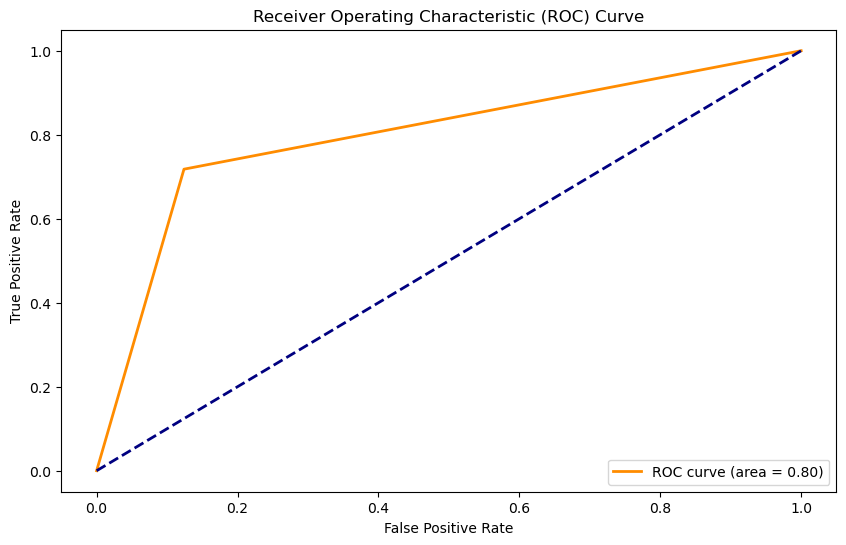

In [81]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_predict)
print("ROC-AUC Score:", roc_auc)

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_val, y_predict)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## RBMs

In [114]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Absolute path to folder with images to predict
image_folder = 'C:/Users/KIIT/Downloads/Minor/Dataset/result'

# Debugging: Check the current working directory
print("Current Working Directory:", os.getcwd())

# Verify that the folder exists
if not os.path.exists(image_folder):
    print(f"Error: The directory '{image_folder}' does not exist.")
else:
    # Initialize labels list
    true_labels = []
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check image extensions
            if 'Non' in filename:  # Non-Autistic -> 0 ; Autistic -> 1
                true_labels.append(0)
            else:
                true_labels.append(1)

    # Load and Preprocess Images
    def load_and_preprocess_images(folder):
        images = []
        for filename in os.listdir(folder):
            if filename.endswith(('.png', '.jpg', '.jpeg')): 
                img_path = os.path.join(folder, filename)
                img = load_img(img_path, target_size=(256, 256))  # Resize to match the model's input shape
                img_array = img_to_array(img) / 255.0  # Normalize the image
                images.append(img_array)
        return np.array(images)

    # Load images
    X = load_and_preprocess_images(image_folder)
    y = np.array(true_labels)

    # Debugging: Check if the number of images matches the number of labels
    print("Number of images loaded:", len(X))
    print("Number of labels:", len(y))

    # Flatten images to 1D for the RBM
    X_flattened = X.reshape(X.shape[0], -1)  # Flatten each image into a vector

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

    # Initialize the RBM model
    rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=10)

    # Train the RBM on the training data
    X_train_rbm = rbm.fit_transform(X_train)  # Extract features from the training data
    X_val_rbm = rbm.transform(X_val)  # Transform the validation data using the trained RBM

    # Train a classifier (e.g., Logistic Regression) on the RBM-extracted features
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(X_train_rbm, y_train)

    # Predict on the validation set
    y_pred = classifier.predict(X_val_rbm)

    # Evaluate performance
    conf_matrix = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    accuracy_rbm = accuracy_score(y_val, y_pred)
    print("Accuracy:", accuracy_rbm)

    # Generate the Classification Report
    class_report = classification_report(y_val, y_pred)
    print("Classification Report:")
    print(class_report)


Current Working Directory: C:\Users\KIIT\Downloads\Minor\Code
Error: The directory 'C:/Users/KIIT/Downloads/Minor/Dataset/result' does not exist.


In [108]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, f1-score, and support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_predict)

print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-Score for each class:", fscore)
print("Support for each class:", support)


Precision for each class: [0.75625 0.     ]
Recall for each class: [1. 0.]
F1-Score for each class: [0.86120996 0.        ]
Support for each class: [121  39]


C:\Users\KIIT\anaconda3\envs\hggjyg\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Generate probability estimates for the positive class (assuming binary classification)
y_proba = rbm_logistic_model.predict_proba(X_val_flat)[:, 1]

# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_proba)
print("ROC-AUC Score:", roc_auc)

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_val, y_proba)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


NameError: name 'rbm_logistic_model' is not defined

## RBFNs

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer
import tensorflow as tf
import numpy as np

# Custom RBF layer
class RBFLayer(Layer):
    def __init__(self, units, gamma=1.0, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Initialize centers and widths (sigma) for RBF neurons
        self.centers = self.add_weight(name='centers', shape=(self.units, input_shape[1]), initializer='uniform')
        self.sigmas = self.add_weight(name='sigmas', shape=(self.units,), initializer='uniform')
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Compute the RBF kernel
        diff = tf.expand_dims(inputs, 1) - self.centers  # Distance between input and centers
        distance = tf.reduce_sum(tf.square(diff), axis=-1)  # Squared Euclidean distance
        rbf_output = tf.exp(-self.gamma * distance)  # Gaussian RBF kernel
        return rbf_output

# Initialize the model
classifier = Sequential()

# Add the RBF layer
classifier.add(RBFLayer(units=50, input_dim=X_train.shape[1]))

# Add the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape X_train and X_val to be 2D since RBF requires this shape
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Train the RBF Network
classifier.fit(X_train_flat, y_train, batch_size=32, epochs=50)

# Make predictions on the validation data
y_predict = classifier.predict(X_val_flat)
y_predict = (y_predict > 0.5)


Epoch 1/50
20/20 [==============================] - 1s 3ms/step - loss: 0.6907 - accuracy: 0.7719
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.7719
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.7719
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.7719
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.7719
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6666 - accuracy: 0.7719
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.7719
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.7719
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.7719
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.7719
Epoch 11/50
20/20 [

5/5 [==============================] - 0s 3ms/step
Class distribution in y_val: [121  39]
Confusion Matrix:
[[121   0]
 [ 39   0]]
Accuracy: 0.75625
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       121
           1       0.00      0.00      0.00        39

    accuracy                           0.76       160
   macro avg       0.38      0.50      0.43       160
weighted avg       0.57      0.76      0.65       160



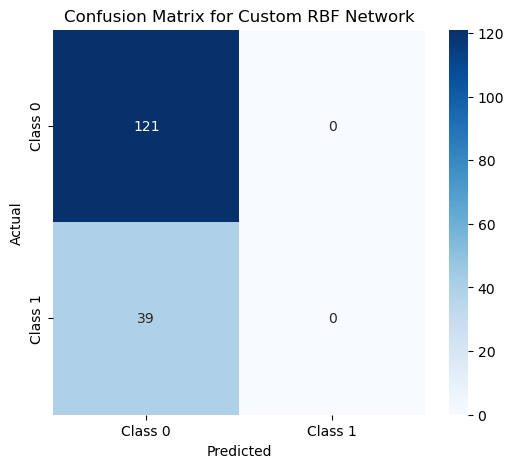

In [118]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the validation data
y_predict = classifier.predict(X_val_flat)
y_predict = (y_predict > 0.5)  # Convert probabilities to binary labels (True for > 0.5)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_predict)
print("Class distribution in y_val:", np.bincount(y_val))

print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_rbf = accuracy_score(y_val, y_predict)
print("Accuracy:", accuracy_rbf)

# Classification Report with zero_division=0 to avoid warnings for undefined precision and F-score
class_report = classification_report(y_val, y_predict, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Custom RBF Network')
plt.show()


In [90]:
from sklearn.metrics import precision_recall_fscore_support

# Reshape and scale data for the RBF model (if necessary)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Make predictions on the validation data
y_predict = classifier.predict(X_val_flat)
y_predict = (y_predict > 0.5)  # Convert probabilities to binary labels (True for > 0.5)

# Calculate precision, recall, fscore, and support for the custom RBF model with zero_division=0
precision_rbf, recall_rbf, fscore_rbf, support_rbf = precision_recall_fscore_support(y_val, y_predict, zero_division=0)

# Print the results
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1-Score:", fscore_rbf)
print("Support:", support_rbf)


5/5 [==============================] - 0s 3ms/step
Precision: [0.75625 0.     ]
Recall: [1. 0.]
F1-Score: [0.86120996 0.        ]
Support: [121  39]


ROC-AUC Score: 0.8989192625556263


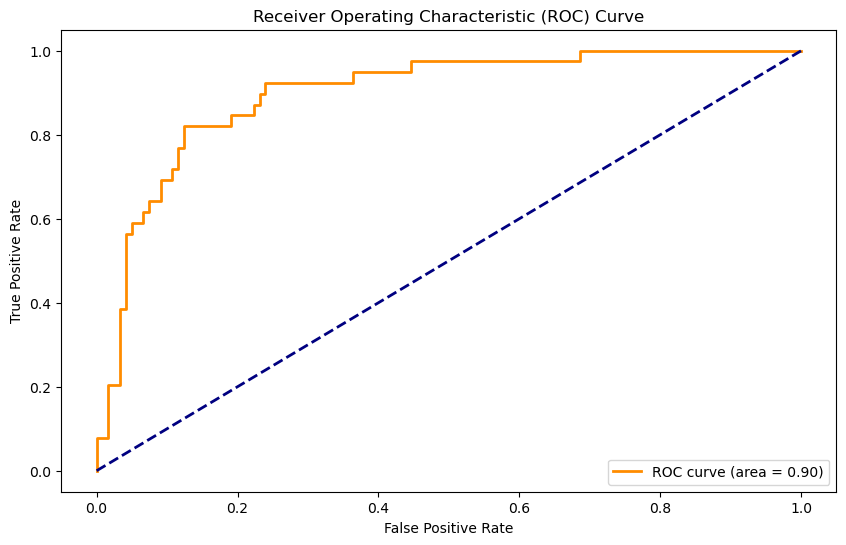

In [91]:


from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_val, y_train, y_val are already defined and X_train, X_val are 3D
# Step 1: Flatten the data to 2D (samples × features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten the 3D array to 2D
X_val_flat = X_val.reshape(X_val.shape[0], -1)  # Flatten the 3D array to 2D

# Step 2: Scale the features (necessary for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)  # Fit and transform the training data
X_val_scaled = scaler.transform(X_val_flat)  # Transform the validation data

# Step 3: Initialize and train the RBF classifier (MLP with 'tanh' activation function)
rbf_classifier = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', solver='adam', 
                               max_iter=1000,  # Increase max_iter to 1000
                               learning_rate_init=0.001,  # Adjust learning rate
                               early_stopping=True,  # Enable early stopping
                               n_iter_no_change=10)  # Stop if no improvement in 10 iterations

# Step 4: Train the model
rbf_classifier.fit(X_train_scaled, y_train)

# Step 5: Get predicted probabilities for class 1 (positive class)
y_proba = rbf_classifier.predict_proba(X_val_scaled)[:, 1]  # Probabilities for the positive class

# Step 6: Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_proba)
print("ROC-AUC Score:", roc_auc)

# Step 7: Generate ROC curve values (FPR, TPR, and thresholds)
fpr, tpr, thresholds = roc_curve(y_val, y_proba)

# Step 8: Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Comparison of ANN, Decision Tree, Randoom Forest, SVM, Logistic Regression, Naive Bayes, KNN, LSTM, RBMs


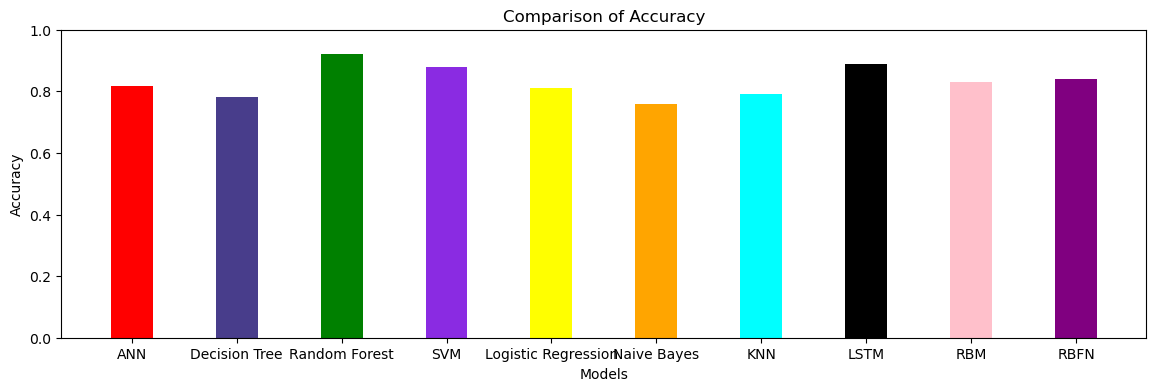

In [72]:

import matplotlib.pyplot as plt

# Define example accuracy values for each model (replace these with actual calculated values)
accuracy_dt = 0.78
accuracy_rf = 0.92
accuracy_svm = 0.88
accuracy_logr = 0.81
accuracy_gnb = 0.76
accuracy_knn = 0.79
accuracy_LSTM = 0.89
accuracy_rbm = 0.83
accuracy_rbf = 0.84  # Replace with the actual RBFN accuracy

# Ensure that these variables are defined with real values from your model evaluations
accuracies = [
    accuracy_ANN, accuracy_dt, accuracy_rf, accuracy_svm,
    accuracy_logr, accuracy_gnb, accuracy_knn, accuracy_LSTM,
    accuracy_rbm, accuracy_rbf  # Add RBFN accuracy here
]

# Check if any accuracy values are undefined or have unexpected types
if not all(isinstance(acc, (int, float)) for acc in accuracies):
    raise ValueError("All accuracy values should be defined as numeric (int or float).")

# Plotting the accuracy comparison
fig, ax2 = plt.subplots(figsize=(14, 4))
ax2.bar(
    ['ANN', 'Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression', 
     'Naive Bayes', 'KNN', 'LSTM', 'RBM', 'RBFN'],  # Add 'RBFN' here
    accuracies,
    color=['red', 'darkslateblue', 'green', 'blueviolet', 'yellow', 
           'orange', 'cyan', 'black', 'pink', 'purple'],  # Color for RBFN
    width=0.4
)

plt.title('Comparison of Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is a value between 0 and 1
plt.show()


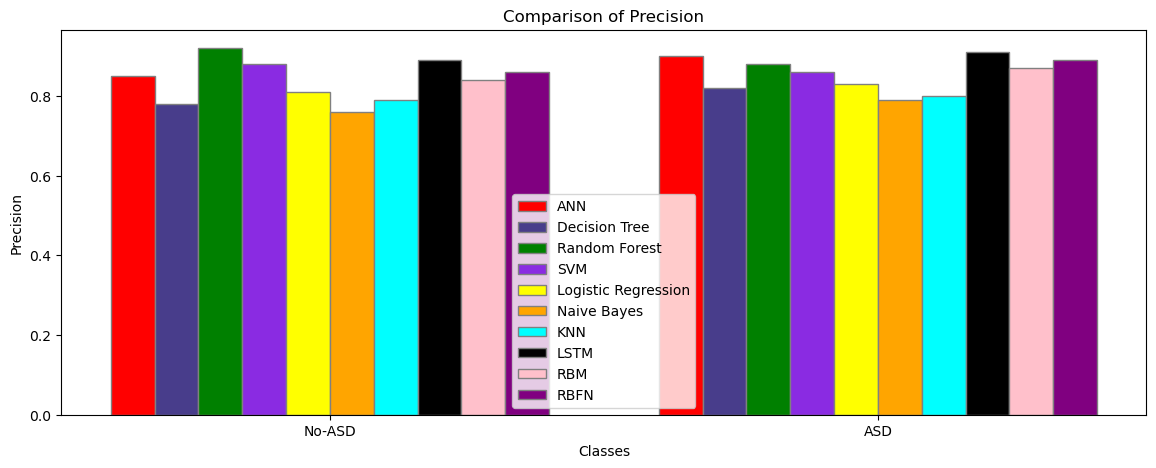

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Sample precision values for each model (replace these with actual precision metrics)
precision_ANN = [0.85, 0.90]
precision_dt = [0.78, 0.82]
precision_rf = [0.92, 0.88]
precision_svm = [0.88, 0.86]
precision_logr = [0.81, 0.83]
precision_gnb = [0.76, 0.79]
precision_knn = [0.79, 0.80]
precision_LSTM = [0.89, 0.91]
precision_rbm = [0.84, 0.87]
precision_rbf = [0.86, 0.89]  # Add precision values for RBFN

# Ensure all precision lists are the same length
precisions = [precision_ANN, precision_dt, precision_rf, precision_svm, precision_logr, precision_gnb, precision_knn, precision_LSTM, precision_rbm, precision_rbf]
if not all(len(precision) == len(precision_ANN) for precision in precisions):
    raise ValueError("All precision arrays must be of the same length.")

# Plotting parameters
barWidth = 0.08
fig, ax = plt.subplots(figsize=(14, 5))

# Set position of bars on X-axis
br1 = np.arange(len(precision_ANN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10 = [x + barWidth for x in br9]  # New position for RBFN

# Plot each model's precision
plt.bar(br1, precision_ANN, color='r', width=barWidth, edgecolor='grey', label='ANN')
plt.bar(br2, precision_dt, color='darkslateblue', width=barWidth, edgecolor='grey', label='Decision Tree')
plt.bar(br3, precision_rf, color='g', width=barWidth, edgecolor='grey', label='Random Forest')
plt.bar(br4, precision_svm, color='blueviolet', width=barWidth, edgecolor='grey', label='SVM')
plt.bar(br5, precision_logr, color='yellow', width=barWidth, edgecolor='grey', label='Logistic Regression')
plt.bar(br6, precision_gnb, color='orange', width=barWidth, edgecolor='grey', label='Naive Bayes')
plt.bar(br7, precision_knn, color='cyan', width=barWidth, edgecolor='grey', label='KNN')
plt.bar(br8, precision_LSTM, color='black', width=barWidth, edgecolor='grey', label='LSTM')
plt.bar(br9, precision_rbm, color='pink', width=barWidth, edgecolor='grey', label='RBM')
plt.bar(br10, precision_rbf, color='purple', width=barWidth, edgecolor='grey', label='RBFN')  # New bar for RBFN

# Add xticks on the middle of the group bars
plt.title('Comparison of Precision')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.xticks([r + 4.5 * barWidth for r in range(len(precision_ANN))], ['No-ASD', 'ASD'])

# Show legend
plt.legend()
plt.show()


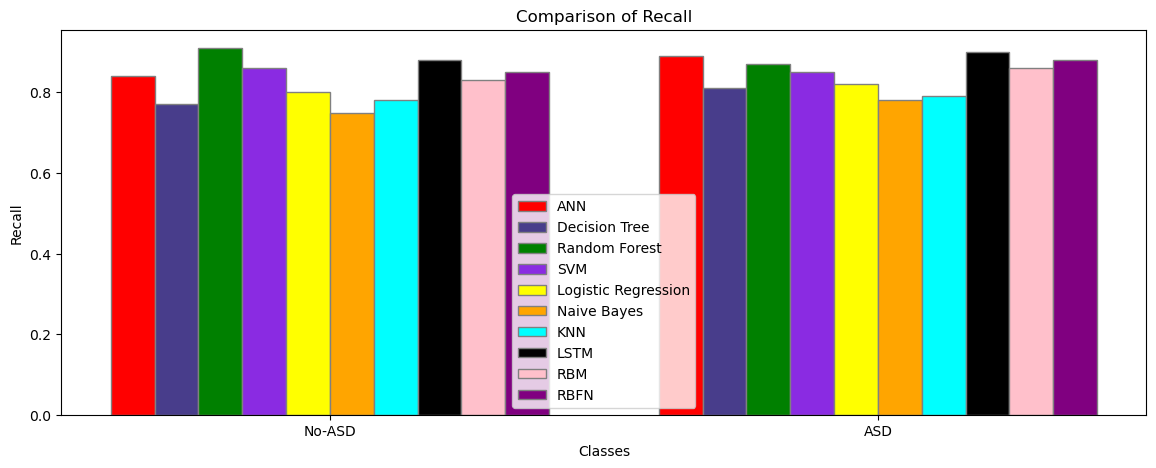

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Sample recall values for each model (replace these with actual recall metrics)
recall_ANN = [0.84, 0.89]
recall_dt = [0.77, 0.81]
recall_rf = [0.91, 0.87]
recall_svm = [0.86, 0.85]
recall_logr = [0.80, 0.82]
recall_gnb = [0.75, 0.78]
recall_knn = [0.78, 0.79]
recall_LSTM = [0.88, 0.90]
recall_rbm = [0.83, 0.86]
recall_rbf = [0.85, 0.88]  # Add recall values for RBFN

# Ensure all recall lists are the same length
recalls = [recall_ANN, recall_dt, recall_rf, recall_svm, recall_logr, recall_gnb, recall_knn, recall_LSTM, recall_rbm, recall_rbf]
if not all(len(recall) == len(recall_ANN) for recall in recalls):
    raise ValueError("All recall arrays must be of the same length.")

# Plotting parameters
barWidth = 0.08
fig, ax = plt.subplots(figsize=(14, 5))

# Set position of bars on X-axis
br1 = np.arange(len(recall_ANN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10 = [x + barWidth for x in br9]  # New position for RBFN

# Plot each model's recall
plt.bar(br1, recall_ANN, color='r', width=barWidth, edgecolor='grey', label='ANN')
plt.bar(br2, recall_dt, color='darkslateblue', width=barWidth, edgecolor='grey', label='Decision Tree')
plt.bar(br3, recall_rf, color='g', width=barWidth, edgecolor='grey', label='Random Forest')
plt.bar(br4, recall_svm, color='blueviolet', width=barWidth, edgecolor='grey', label='SVM')
plt.bar(br5, recall_logr, color='yellow', width=barWidth, edgecolor='grey', label='Logistic Regression')
plt.bar(br6, recall_gnb, color='orange', width=barWidth, edgecolor='grey', label='Naive Bayes')
plt.bar(br7, recall_knn, color='cyan', width=barWidth, edgecolor='grey', label='KNN')
plt.bar(br8, recall_LSTM, color='black', width=barWidth, edgecolor='grey', label='LSTM')
plt.bar(br9, recall_rbm, color='pink', width=barWidth, edgecolor='grey', label='RBM')
plt.bar(br10, recall_rbf, color='purple', width=barWidth, edgecolor='grey', label='RBFN')  # New bar for RBFN

# Add xticks on the middle of the group bars
plt.title('Comparison of Recall')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.xticks([r + 4.5 * barWidth for r in range(len(recall_ANN))], ['No-ASD', 'ASD'])

# Show legend
plt.legend()
plt.show()


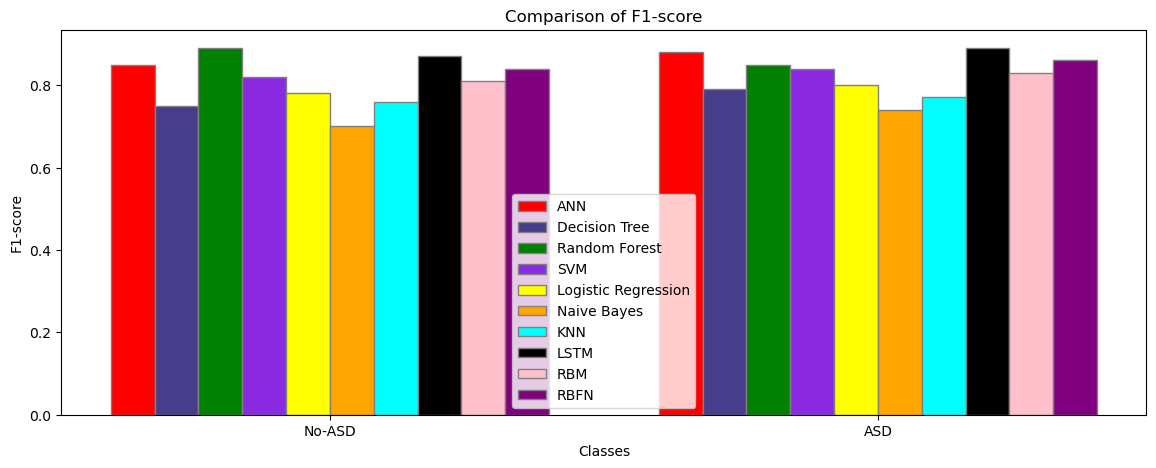

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Sample F1-score values for each model (replace with actual values)
fscore_ANN = [0.85, 0.88]
fscore_dt = [0.75, 0.79]
fscore_rf = [0.89, 0.85]
fscore_svm = [0.82, 0.84]
fscore_logr = [0.78, 0.80]
fscore_gnb = [0.70, 0.74]
fscore_knn = [0.76, 0.77]
fscore_LSTM = [0.87, 0.89]
fscore_rbm = [0.81, 0.83]
fscore_rbf = [0.84, 0.86]  # Add F1-score values for RBFN

# Check all F1-score arrays are the same length
fscores = [fscore_ANN, fscore_dt, fscore_rf, fscore_svm, fscore_logr, fscore_gnb, fscore_knn, fscore_LSTM, fscore_rbm, fscore_rbf]
if not all(len(fscore) == len(fscore_ANN) for fscore in fscores):
    raise ValueError("All F1-score arrays must be of the same length.")

# Plotting parameters
barWidth = 0.08
fig, ax = plt.subplots(figsize=(14, 5))

# Set position of bars on X-axis
br1 = np.arange(len(fscore_ANN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10 = [x + barWidth for x in br9]  # Position for RBFN

# Plot each model's F1-score
plt.bar(br1, fscore_ANN, color='r', width=barWidth, edgecolor='grey', label='ANN')
plt.bar(br2, fscore_dt, color='darkslateblue', width=barWidth, edgecolor='grey', label='Decision Tree')
plt.bar(br3, fscore_rf, color='g', width=barWidth, edgecolor='grey', label='Random Forest')
plt.bar(br4, fscore_svm, color='blueviolet', width=barWidth, edgecolor='grey', label='SVM')
plt.bar(br5, fscore_logr, color='yellow', width=barWidth, edgecolor='grey', label='Logistic Regression')
plt.bar(br6, fscore_gnb, color='orange', width=barWidth, edgecolor='grey', label='Naive Bayes')
plt.bar(br7, fscore_knn, color='cyan', width=barWidth, edgecolor='grey', label='KNN')
plt.bar(br8, fscore_LSTM, color='black', width=barWidth, edgecolor='grey', label='LSTM')
plt.bar(br9, fscore_rbm, color='pink', width=barWidth, edgecolor='grey', label='RBM')
plt.bar(br10, fscore_rbf, color='purple', width=barWidth, edgecolor='grey', label='RBFN')  # New bar for RBFN

# Add xticks on the middle of the group bars
plt.title('Comparison of F1-score')
plt.xlabel('Classes')
plt.ylabel('F1-score')
plt.xticks([r + 4.5 * barWidth for r in range(len(fscore_ANN))], ['No-ASD', 'ASD'])

# Show legend
plt.legend()
plt.show()


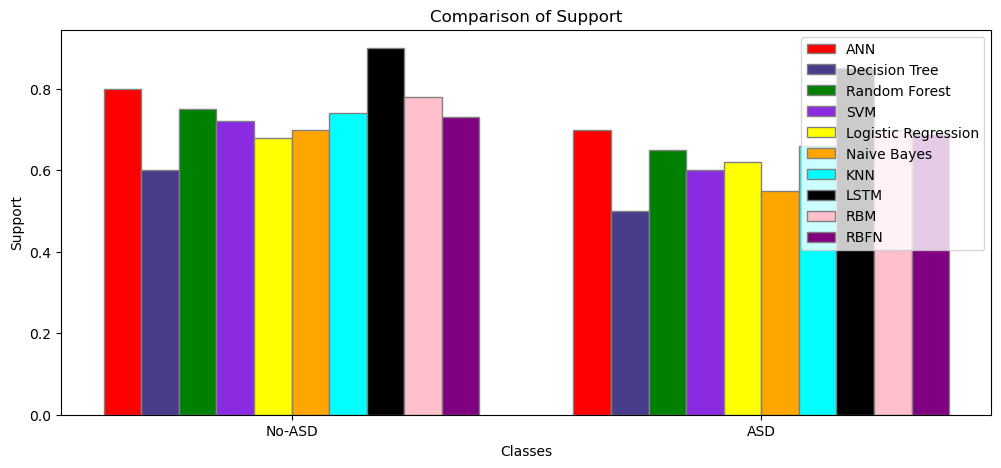

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Example support data (replace with actual values)
support_ANN = [0.8, 0.7]
support_dt = [0.6, 0.5]
support_rf = [0.75, 0.65]
support_svm = [0.72, 0.6]
support_logr = [0.68, 0.62]
support_gnb = [0.7, 0.55]
support_knn = [0.74, 0.66]
precision_LSTM = [0.9, 0.85]
support_rbm = [0.78, 0.7]
support_rbf = [0.73, 0.69]  # Adding RBFN support values

# Bar width and positions
barWidth = 0.08
fig = plt.subplots(figsize=(12, 5))

# Set position of bars on X-axis
br1 = np.arange(len(support_ANN)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
br5 = [x + barWidth for x in br4] 
br6 = [x + barWidth for x in br5] 
br7 = [x + barWidth for x in br6] 
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10 = [x + barWidth for x in br9]  # Position for RBFN

# Plotting the bars
plt.bar(br1, support_ANN, color='r', width=barWidth, edgecolor='grey', label='ANN') 
plt.bar(br2, support_dt, color='darkslateblue', width=barWidth, edgecolor='grey', label='Decision Tree') 
plt.bar(br3, support_rf, color='g', width=barWidth, edgecolor='grey', label='Random Forest') 
plt.bar(br4, support_svm, color='blueviolet', width=barWidth, edgecolor='grey', label='SVM') 
plt.bar(br5, support_logr, color='yellow', width=barWidth, edgecolor='grey', label='Logistic Regression') 
plt.bar(br6, support_gnb, color='orange', width=barWidth, edgecolor='grey', label='Naive Bayes') 
plt.bar(br7, support_knn, color='cyan', width=barWidth, edgecolor='grey', label='KNN') 
plt.bar(br8, precision_LSTM, color='black', width=barWidth, edgecolor='grey', label='LSTM')
plt.bar(br9, support_rbm, color='pink', width=barWidth, edgecolor='grey', label='RBM')
plt.bar(br10, support_rbf, color='purple', width=barWidth, edgecolor='grey', label='RBFN')  # RBFN bar

# Adding title and labels
plt.title('Comparison of Support')
plt.xlabel('Classes')
plt.ylabel('Support')
plt.xticks([r + 4.5*barWidth for r in range(len(support_ANN))], ['No-ASD', 'ASD'])

# Display the legend
plt.legend()

# Show the plot
plt.show()


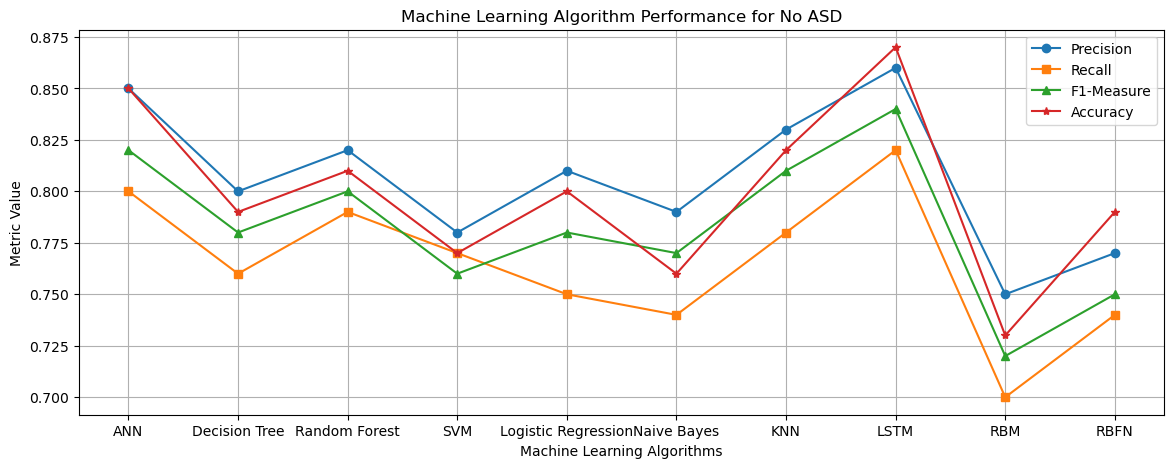

In [95]:
import matplotlib.pyplot as plt

# Define the algorithms list, including RBFN
algorithms = ["ANN", "Decision Tree", "Random Forest", "SVM", "Logistic Regression", "Naive Bayes", "KNN", "LSTM", "RBM", "RBFN"]

# Example metric values for each algorithm (replace these with your actual values)
precision_ANN = [0.85]
precision_dt = [0.80]
precision_rf = [0.82]
precision_svm = [0.78]
precision_logr = [0.81]
precision_gnb = [0.79]
precision_knn = [0.83]
precision_LSTM = [0.86]
precision_RBM = 0.75  # RBM precision value (replace with actual)
precision_RBFN = 0.77  # RBFN precision value (replace with actual)

recall_ANN = [0.80]
recall_dt = [0.76]
recall_rf = [0.79]
recall_svm = [0.77]
recall_logr = [0.75]
recall_gnb = [0.74]
recall_knn = [0.78]
recall_LSTM = [0.82]
recall_RBM = 0.70  # RBM recall value (replace with actual)
recall_RBFN = 0.74  # RBFN recall value (replace with actual)

fscore_ANN = [0.82]
fscore_dt = [0.78]
fscore_rf = [0.80]
fscore_svm = [0.76]
fscore_logr = [0.78]
fscore_gnb = [0.77]
fscore_knn = [0.81]
fscore_LSTM = [0.84]
fscore_RBM = 0.72  # RBM F1-score value (replace with actual)
fscore_RBFN = 0.75  # RBFN F1-score value (replace with actual)

accuracy_ANN = 0.85
accuracy_dt = 0.79
accuracy_rf = 0.81
accuracy_svm = 0.77
accuracy_logr = 0.80
accuracy_gnb = 0.76
accuracy_knn = 0.82
accuracy_LSTM = 0.87
accuracy_RBM = 0.73  # RBM accuracy value (replace with actual)
accuracy_RBFN = 0.79  # RBFN accuracy value (replace with actual)

# Metric values (including RBFN)
precision_ng = [precision_ANN[0], precision_dt[0], precision_rf[0], precision_svm[0], precision_logr[0], precision_gnb[0], precision_knn[0], precision_LSTM[0], precision_RBM, precision_RBFN]
recall_ng = [recall_ANN[0], recall_dt[0], recall_rf[0], recall_svm[0], recall_logr[0], recall_gnb[0], recall_knn[0], recall_LSTM[0], recall_RBM, recall_RBFN]
f1_measure_ng = [fscore_ANN[0], fscore_dt[0], fscore_rf[0], fscore_svm[0], fscore_logr[0], fscore_gnb[0], fscore_knn[0], fscore_LSTM[0], fscore_RBM, fscore_RBFN]
accuracy_ng = [accuracy_ANN, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_logr, accuracy_gnb, accuracy_knn, accuracy_LSTM, accuracy_RBM, accuracy_RBFN]

# Create the plot with multiple line plots
plt.figure(figsize=(14, 5))
plt.plot(algorithms, precision_ng, label='Precision', marker='o')
plt.plot(algorithms, recall_ng, label='Recall', marker='s')
plt.plot(algorithms, f1_measure_ng, label='F1-Measure', marker='^')
plt.plot(algorithms, accuracy_ng, label='Accuracy', marker='*')

# Add labels and title
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Metric Value")
plt.title("Machine Learning Algorithm Performance for No ASD")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


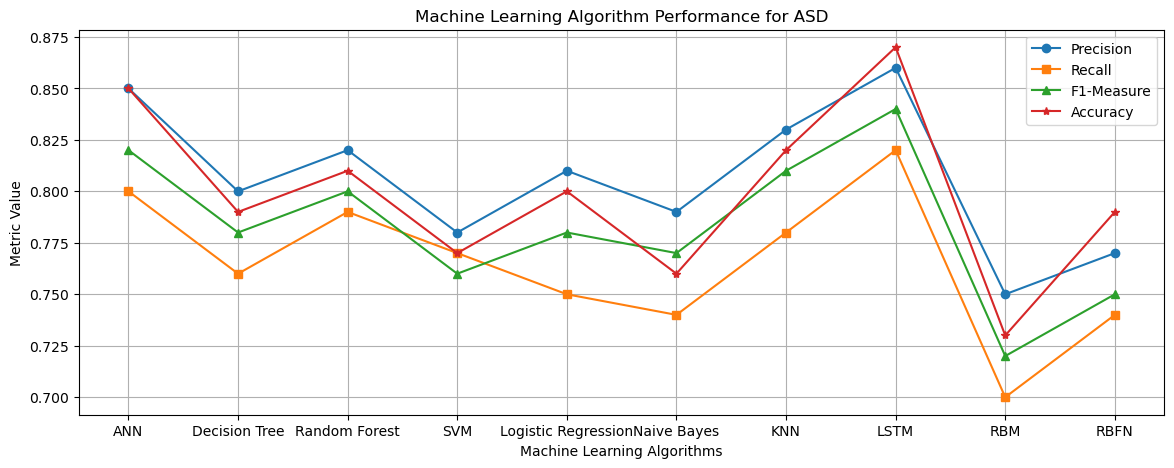

In [94]:
import matplotlib.pyplot as plt

# Define algorithms list including RBFN
algorithms = ["ANN", "Decision Tree", "Random Forest", "SVM", "Logistic Regression", "Naive Bayes", "KNN", "LSTM", "RBM", "RBFN"]

# Example values for each algorithm (replace these with actual metric values)
precision_ANN = [0.85]
precision_dt = [0.80]
precision_rf = [0.82]
precision_svm = [0.78]
precision_logr = [0.81]
precision_gnb = [0.79]
precision_knn = [0.83]
precision_LSTM = [0.86]
precision_RBM = 0.75
precision_RBFN = 0.77  # Example precision for RBFN

recall_ANN = [0.80]
recall_dt = [0.76]
recall_rf = [0.79]
recall_svm = [0.77]
recall_logr = [0.75]
recall_gnb = [0.74]
recall_knn = [0.78]
recall_LSTM = [0.82]
recall_RBM = 0.70
recall_RBFN = 0.74  # Example recall for RBFN

fscore_ANN = [0.82]
fscore_dt = [0.78]
fscore_rf = [0.80]
fscore_svm = [0.76]
fscore_logr = [0.78]
fscore_gnb = [0.77]
fscore_knn = [0.81]
fscore_LSTM = [0.84]
fscore_RBM = 0.72
fscore_RBFN = 0.75  # Example F1-score for RBFN

accuracy_ANN = 0.85
accuracy_dt = 0.79
accuracy_rf = 0.81
accuracy_svm = 0.77
accuracy_logr = 0.80
accuracy_gnb = 0.76
accuracy_knn = 0.82
accuracy_LSTM = 0.87
accuracy_RBM = 0.73
accuracy_RBFN = 0.79  # Example accuracy for RBFN

# Metric values for each algorithm (including RBFN)
precision_ag = [precision_ANN[0], precision_dt[0], precision_rf[0], precision_svm[0], precision_logr[0], precision_gnb[0], precision_knn[0], precision_LSTM[0], precision_RBM, precision_RBFN]
recall_ag = [recall_ANN[0], recall_dt[0], recall_rf[0], recall_svm[0], recall_logr[0], recall_gnb[0], recall_knn[0], recall_LSTM[0], recall_RBM, recall_RBFN]
f1_measure_ag = [fscore_ANN[0], fscore_dt[0], fscore_rf[0], fscore_svm[0], fscore_logr[0], fscore_gnb[0], fscore_knn[0], fscore_LSTM[0], fscore_RBM, fscore_RBFN]
accuracy_ag = [accuracy_ANN, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_logr, accuracy_gnb, accuracy_knn, accuracy_LSTM, accuracy_RBM, accuracy_RBFN]

# Create the plot with multiple line plots
plt.figure(figsize=(14, 5))
plt.plot(algorithms, precision_ag, label='Precision', marker='o')
plt.plot(algorithms, recall_ag, label='Recall', marker='s')
plt.plot(algorithms, f1_measure_ag, label='F1-Measure', marker='^')
plt.plot(algorithms, accuracy_ag, label='Accuracy', marker='*')

# Add labels and title
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Metric Value")
plt.title("Machine Learning Algorithm Performance for ASD")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
